In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview

In [2]:
combineddata_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
combineddata_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [4]:
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [5]:
# Checking the number of mice
mousecount = combineddata_df["Mouse ID"].count()
mousecount

1893

In [6]:
duplicate = combineddata_df[combineddata_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata = combineddata_df.drop_duplicates("Mouse ID")
cleandata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [8]:
# Checking the number of mice in the clean DataFrame.
 
clean_mice=combineddata_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

249

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
data_mean = combineddata_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
data_mean

data_median = combineddata_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
data_median

data_variance = combineddata_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
data_variance

data_std = combineddata_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
data_std

data_sem = combineddata_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
data_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [10]:
combineddata_df.agg({'Tumor Volume (mm3)':["median", "mean", "var", "std", "sem"]})

,Tumor Volume (mm3)
median,48.951474
mean,50.448381
var,79.116074
std,8.894722
sem,0.204436


Text(0, 0.5, 'Number of mouse tested')

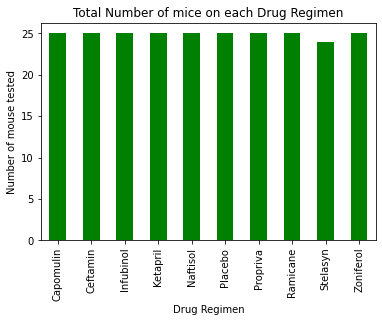

In [11]:
mice_data = combineddata_df.groupby(["Drug Regimen"])["Mouse ID"].nunique()
ax = mice_data.plot(kind="bar",title ="Total Number of mice on each Drug Regimen",facecolor="green")
ax.set_ylabel("Number of mouse tested")



(-1.1045613723658971,
 1.1002172082078998,
 -1.105172849624489,
 1.1027130801595115)

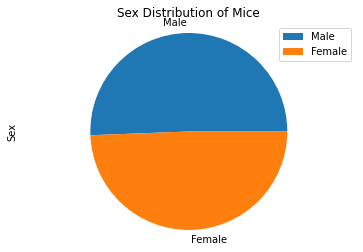

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using PANDAS
# Generate a pie plot showing the distribution of female versus male mice using PANDAS
sexdata = combineddata_df["Sex"].value_counts()
sex_df = sexdata.to_frame()

sex_pie = sex_df.plot(kind="pie", y='Sex', title=("Sex Distribution of Mice"))

plt.axis("equal")

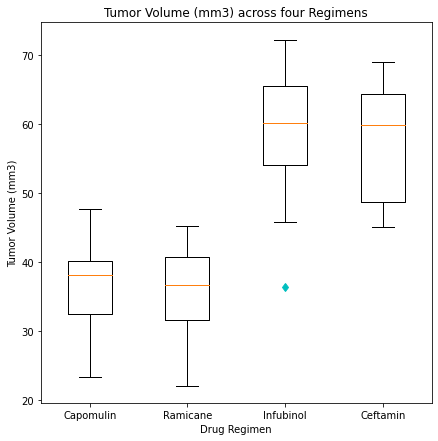

In [13]:
timepoint = combineddata_df.groupby("Mouse ID")["Timepoint"].max()

vol_df = pd.merge(combineddata_df, timepoint, how="inner", on=["Mouse ID", "Timepoint"])

list_of_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol = []

for drug in list_of_drugs:
    volume_df = vol_df.loc[vol_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df)
    quartiles = volume_df.quantile([0.25,0.5,0.75])

    iqr = quartiles[0.75] - quartiles[0.25]

    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)
    
blue_dot = dict(markerfacecolor="c",marker="d", markeredgecolor="c")
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.boxplot(tumor_vol, flierprops=blue_dot)
ax1.set_title("Tumor Volume (mm3) across four Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.set(ticks=range(1,len(list_of_drugs) + 1),ticklabels=list_of_drugs)

plt.show()

In [14]:
Capomulin_df = combineddata_df.loc[combineddata_df["Drug Regimen"] == "Capomulin",:]
new_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b742",:]
new_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


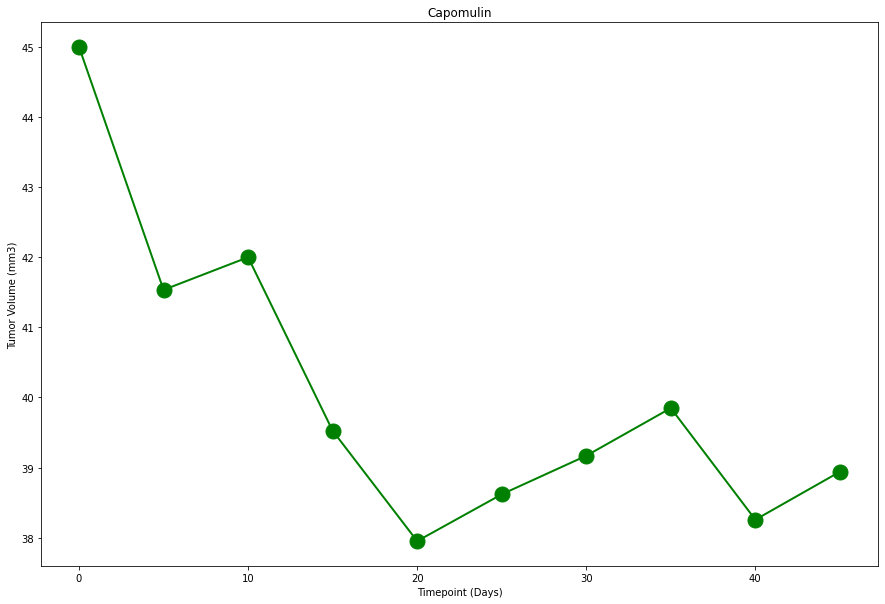

In [15]:
x_axis = new_df["Timepoint"]
y_axis = new_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin')
plt.plot(x_axis, y_axis,linewidth=2, markersize=15,marker="o",color="green", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')



plt.show()
                                              
            

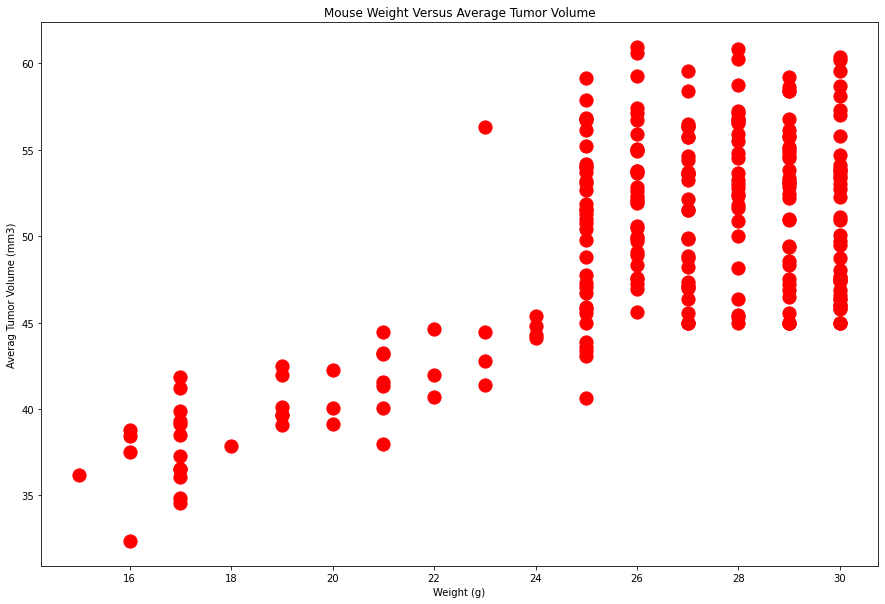

In [16]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capm_vol =combineddata_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="red")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')



plt.show()